In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas-profiling

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
# Ignores warnings from Seaborn
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno # missing data visualization module for Python
import pandas_profiling

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

from plotly.offline import init_notebook_mode, iplot

print("packages loaded successfully")

packages loaded successfully


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/e_commerce_data.csv', encoding = 'latin')

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
#Make column headings easier to work with and to read.

df.rename(index=str, columns={'InvoiceNo': 'invoice_no',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [10]:
df.describe()

,quantity,unit_price,cust_id
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<p style="font-size: 16px; font-family: Arial; line-height: 1.5; color: #222;">
<b>From looking at the above, we can see that we are missing some customer IDs, have negative values under quantity and unit price and also some insights, such as: 50-75% of transactions contain 3-10 items, with most items priced between £2 and £5.  </b>

<Axes: >

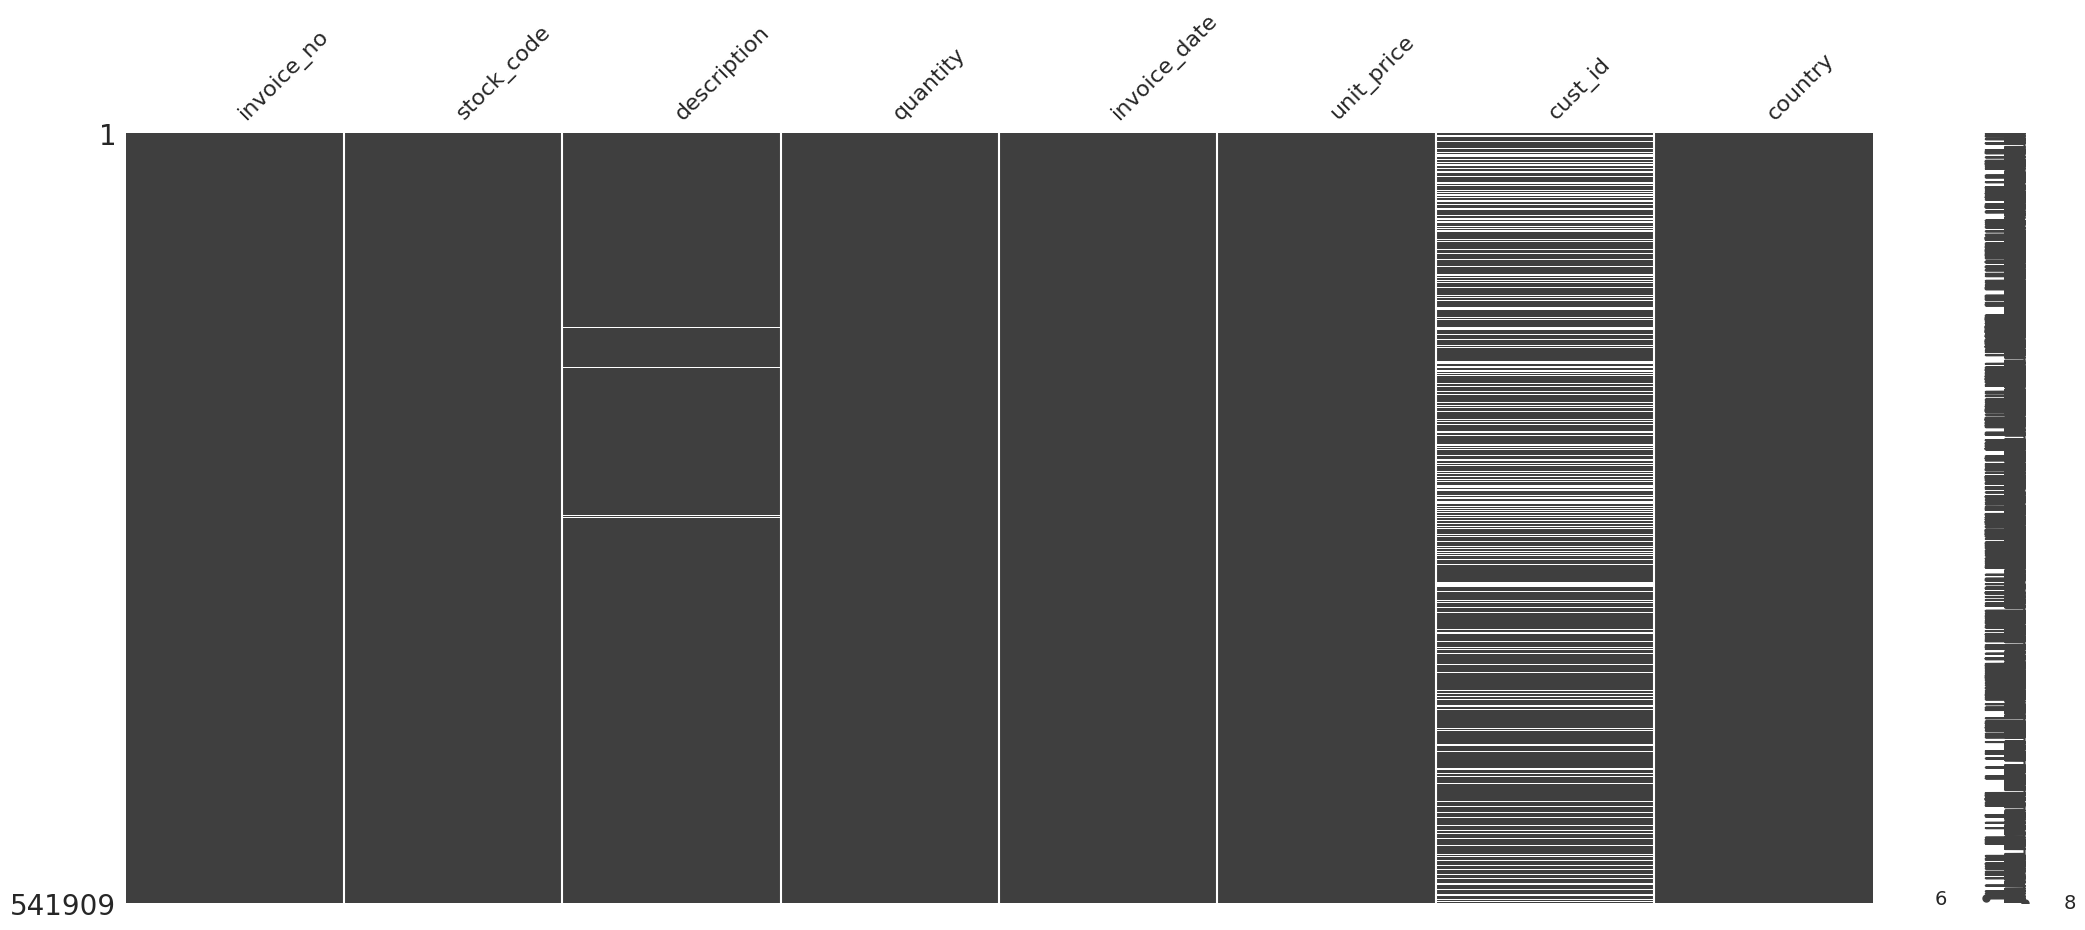

In [11]:
#Visualize missing data using the missingno library
import missingno as msno
msno.matrix(df)

# **Data Profiling**
**Creating a data profiling report using pandas_profiling**

In [12]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file("data_profiling_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **Data Visualization:**
**Plotting histograms to visualize the distribution of numerical features like quantity and unit_price.**

<Axes: xlabel='quantity', ylabel='Count'>

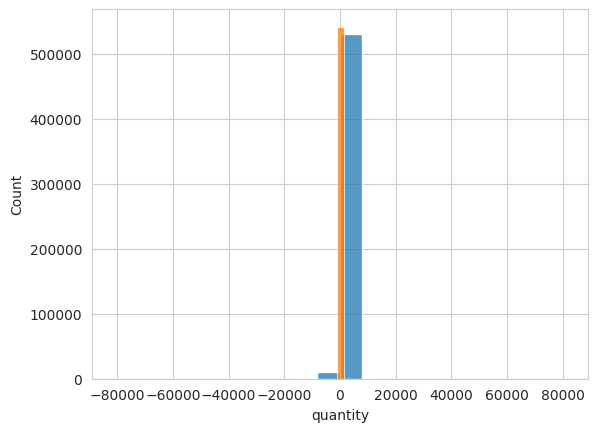

In [13]:
sns.histplot(data=df, x="quantity", bins=20)
sns.histplot(data=df, x="unit_price", bins=20)

# **Country-wise Analysis:**
**Exploring the distribution of transactions across different countries.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'France'),
  Text(3, 0, 'EIRE'),
  Text(4, 0, 'Spain'),
  Text(5, 0, 'Netherlands'),
  Text(6, 0, 'Belgium'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Portugal'),
  Text(9, 0, 'Australia'),
  Text(10, 0, 'Norway'),
  Text(11, 0, 'Italy'),
  Text(12, 0, 'Channel Islands'),
  Text(13, 0, 'Finland'),
  Text(14, 0, 'Cyprus'),
  Text(15, 0, 'Sweden'),
  Text(16, 0, 'Unspecified'),
  Text(17, 0, 'Austria'),
  Text(18, 0, 'Denmark'),
  Text(19, 0, 'Japan'),
  Text(20, 0, 'Poland'),
  Text(21, 0, 'Israel'),
  Text(22, 0, 'USA'),
  Text(23, 0, 'Hong Kong'),
  Text(24, 0, 'Singapore'),
  Text(25, 0, 'Iceland'),
  Text(26, 0, 'Canada'),
  Text(27, 0, 'Greece'),
  Text(28, 0, 'Malta'),
  Text(29, 0, 'United Arab Emirates'),
  Text(30, 0, 'European Comm

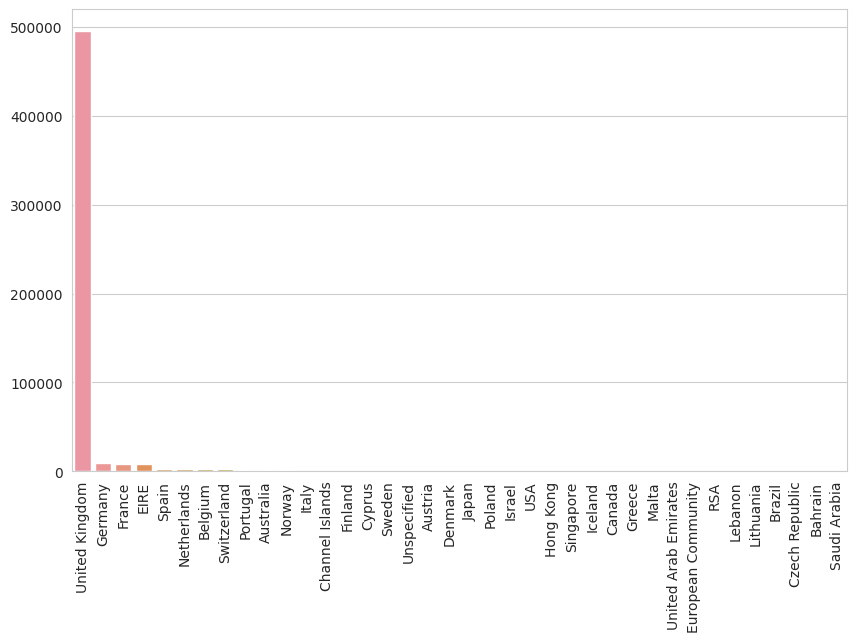

In [14]:
import matplotlib.pyplot as plt
country_counts = df['country'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=90)


# **Time Analysis:**
**Convert invoice_date to datetime format and analyze transactions over time.**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2010-12'),
  Text(1, 0, '2011-01'),
  Text(2, 0, '2011-02'),
  Text(3, 0, '2011-03'),
  Text(4, 0, '2011-04'),
  Text(5, 0, '2011-05'),
  Text(6, 0, '2011-06'),
  Text(7, 0, '2011-07'),
  Text(8, 0, '2011-08'),
  Text(9, 0, '2011-09'),
  Text(10, 0, '2011-10'),
  Text(11, 0, '2011-11'),
  Text(12, 0, '2011-12')])

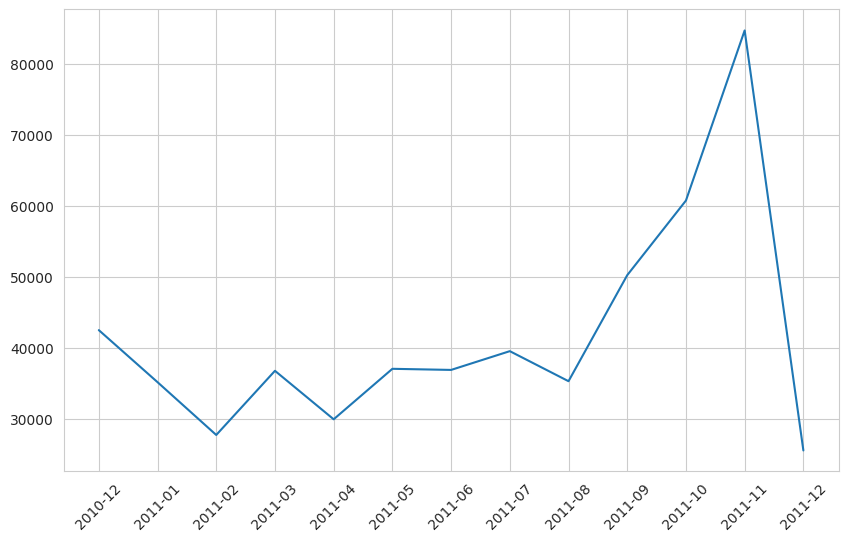

In [15]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['invoice_month'] = df['invoice_date'].dt.to_period('M')
monthly_transactions = df['invoice_month'].value_counts().sort_index()
monthly_transactions.index = monthly_transactions.index.astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_transactions.index, y=monthly_transactions.values)
plt.xticks(rotation=45)

In [16]:
import pandas as pd
import plotly.express as px

# Load and preprocess data
df_new = df.dropna()
df_new = df_new[df_new.quantity > 0]
df_new['cust_id'] = df_new['cust_id'].astype(str)
df_new['total_sales'] = df_new['quantity'] * df_new['unit_price']
df_new = df_new[['invoice_no', 'invoice_date', 'stock_code', 'description',
                 'quantity', 'unit_price', 'total_sales', 'cust_id', 'country']]

In [17]:
# Add Month, Day, and Hour columns
df_new['year_month'] = df_new['invoice_date'].dt.to_period('M')
df_new['month'] = df_new.invoice_date.dt.month
df_new['day'] = df_new.invoice_date.dt.dayofweek + 1
df_new['hour'] = df_new.invoice_date.dt.hour

# Visualize orders by month using Plotly Express
orders_by_month = df_new.groupby('year_month')['invoice_no'].nunique().reset_index()
orders_by_month['year_month_str'] = orders_by_month['year_month'].dt.to_timestamp()  # Convert Period to Timestamp
fig_orders_by_month = px.line(orders_by_month, x='year_month_str', y='invoice_no',
                               title='Total Number of Orders by Month')
fig_orders_by_month.update_xaxes(type='date')  # Set x-axis to date type

# Show the figure
fig_orders_by_month.show()


In [18]:
import plotly.express as px

# Visualize orders by day using Plotly Express
weekday_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
orders_by_day = df_new.groupby('day').agg({'invoice_no': 'nunique'}).reset_index()
orders_by_day['day'] = orders_by_day['day'].map(weekday_map)
fig_orders_by_day = px.bar(orders_by_day, x='day', y='invoice_no',
                            title='Number of Orders by Day', labels={'day': 'Day of Week', 'invoice_no': 'Number of Orders'})

# Show the figure
fig_orders_by_day.show()


# **3.0 DIFFERENT APPROACH FOR EDA**

In [22]:
import plotly.graph_objects as go

#Create total number of orders by country chart

# Group data by country and count number of unique invoice_no for each country
orders_by_country = df_new.groupby('country')['invoice_no'].nunique().reset_index(name='total_orders_country')
orders_by_country = orders_by_country.sort_values('total_orders_country', ascending=False)

# Create bar chart to visualize the number of orders for each country
fig = go.Figure(go.Bar(
            x=orders_by_country['country'],
            y=orders_by_country['total_orders_country'],
            ))
fig.update_layout(title='Total Number of Orders by Country', xaxis_title='Countries', yaxis_title='Number of Orders')
fig.show()

In [23]:
#Create 2nd bar chart for total number of orders by country minus UK for better insight to foreign online sales

orders_by_country = orders_by_country[orders_by_country['country'] != 'United Kingdom']
orders_by_country = orders_by_country.sort_values('total_orders_country', ascending=False)

# Create bar chart to visualize the number of orders for each country
fig = go.Figure(go.Bar(
            x=orders_by_country['country'],
            y=orders_by_country['total_orders_country'],
            ))
fig.update_layout(title='Total Number of Orders by Other Countries (Excl UK)', xaxis_title='Countries', yaxis_title='Number of Orders')
fig.show()

In [24]:
#Create bar chart to show total sales by country (£ GBP)

total_sales_by_country = df_new.groupby('country')['total_sales'].sum().reset_index()
total_sales_by_country = total_sales_by_country.sort_values('total_sales', ascending=False)

fig = go.Figure(go.Bar(
            x=total_sales_by_country['country'],
            y=total_sales_by_country['total_sales'],
            ))
fig.update_layout(title='Total Sales by Country (£ GBP)', xaxis_title='Countries', yaxis_title='Total Sales (£ GBP)')
fig.show()

In [25]:
#Create 2nd bar chart for total sales by country minus UK for better insight to total foreign online sales

total_sales_by_country = df_new.groupby('country')['total_sales'].sum().reset_index()
total_sales_by_country = total_sales_by_country.sort_values('total_sales', ascending=False)
total_sales_by_country = total_sales_by_country[total_sales_by_country['country'] != 'United Kingdom']

fig = go.Figure(go.Bar(
            x=total_sales_by_country['country'],
            y=total_sales_by_country['total_sales'],
            ))
fig.update_layout(title='Total Sales by other Countries (£ GBP)', xaxis_title='Countries', yaxis_title='Total Sales (£ GBP)')
fig.show()